In [1]:
%matplotlib inline

In [113]:
import numpy as np
import pandas as pd

In [114]:
data=pd.read_csv("final\OCDEfinal4.csv")

In [115]:
data.head(10)

,country,location,public_spendingPRY_NTRY2013,public_spendingPRY_TRY2013,public_spendingTRY2013,private_spendingPRY_NTRY2012,private_spendingPRY_NTRY2013,private_spendingPRY_NTRY2014,private_spendingPRY_TRY2012,private_spendingPRY_TRY2013,...,vT021,vT022,vT023,vT024,vT025,vT026,vT027,vT028,valueLOWSRY_AVGAGE,valueLOWSRY_WORK
0,Australia,AUS,3.4,4.7,1.3,4.0,3.9,NaN,5.6,5.6,...,5.1,7.0,14.5,78.1,81.3,78.4,38.5,90.0,43.4,16.7
1,Austria,AUT,3.2,5.0,1.8,3.1,3.2,NaN,4.9,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Belgium,BEL,4.3,5.8,1.4,4.3,4.4,NaN,5.7,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brazil,BRA,4.4,5.5,1.1,4.3,4.3,NaN,5.1,5.2,...,5.7,12.2,19.8,66.7,94.8,95.1,12.6,87.0,39.2,13.6
4,Canada,CAN,NaN,NaN,NaN,3.6,NaN,NaN,6.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Switzerland,CHE,3.5,4.8,1.3,3.8,NaN,NaN,5.1,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Chile,CHL,2.7,3.8,1.2,3.6,3.4,3.1,6.1,5.8,...,4.1,10.8,15.3,73.1,91.0,90.2,33.6,94.6,41.3,15.1
7,Colombia,COL,NaN,NaN,NaN,0.7,4.3,NaN,2.6,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Czech Republic,CZE,2.5,3.4,0.9,2.8,2.7,NaN,4.2,4.0,...,4.5,6.6,8.8,84.0,39.0,51.8,12.2,88.6,44.2,17.7
9,Germany,DEU,2.9,4.2,1.3,3.1,3.1,NaN,4.4,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
cols = data.columns

In [117]:
mask_GINI = np.array(['GINI' in cols[i] for i in range(len(cols))])

In [118]:
cols_GINI = cols[mask_GINI]

In [119]:
data['last_GINI'] = np.zeros(shape=40)

In [120]:
def last_not_nan(nparray):
    #print(nparray)
    for i in nparray[::-1]:
        #print(i)
        if not(np.isnan(i)):
            return i
    return np.nan

In [121]:
for idx in data.index:
    data.loc[data.index==idx, 'last_GINI'] = last_not_nan(np.array(data.loc[data.index==idx][cols_GINI])[0])

In [122]:
data['last_GINI']

0     0.337
1     0.280
2     0.268
3       NaN
4     0.322
5     0.295
6     0.465
7       NaN
8     0.262
9     0.292
10    0.254
11    0.346
12    0.361
13    0.257
14    0.294
15    0.358
16    0.343
17    0.288
18      NaN
19    0.309
20    0.244
21    0.365
22    0.325
23    0.330
24    0.302
25    0.281
26    0.352
27    0.459
28    0.283
29    0.252
30    0.333
31      NaN
32    0.300
33    0.342
34      NaN
35    0.269
36    0.255
37    0.281
38    0.393
39    0.394
Name: last_GINI, dtype: float64

In [123]:
data.to_csv('OCDE_final_withGINI.csv')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
DB=pd.read_csv("OCDEfinal4_newcols.csv", index_col=0, sep=";")
DB.head(1)
DB.index=DB['location']
DBTalis=DB.ix[:,len(DB.columns)-31:len(DB.columns)-2]
DBTalis.head(1)
DBTalis.index=DB['location']

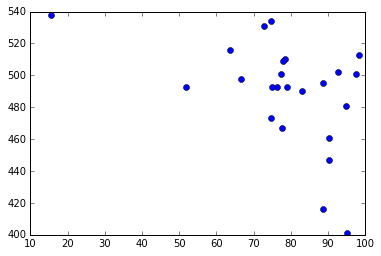

In [3]:
DBPisa=DB['reading2015']

plt.plot(DBTalis['vTBelieveHelpStudentsThinkCritic'],DB['science2015'], "bo")
plt.show()

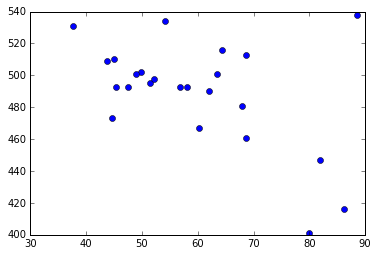

In [4]:
plt.plot(DBTalis['vTFB2'],DB['science2015'], "bo")


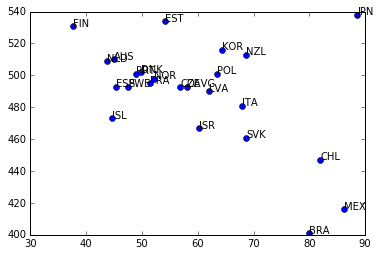

In [5]:
fig, ax = plt.subplots()
plt.plot(DBTalis['vTFB2'], DB['science2015'], "bo")
index=pd.DataFrame(DBTalis['vTFB2'].index)
for i, index in enumerate(index.values):
    ax.annotate(index[0], (DBTalis['vTFB2'].iloc[i],DB['science2015'].iloc[i]))
 


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np

In [7]:
X = DBTalis
X= X.dropna()
X_std = StandardScaler().fit_transform(X)

In [27]:
sklearn_pca = sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [28]:
maxDBPisa=DBPisa.max()
minDBPisa=DBPisa.min()

In [65]:
vectors = sklearn_pca.components_
print(vectors)

[[-0.24333792 -0.32558188 -0.23585826 -0.12969598 -0.20148294  0.05177964
  -0.234052    0.15999069 -0.01269383  0.22659865  0.33211095  0.17454673
   0.05107937  0.04654602  0.26627067  0.14917021  0.21626985  0.11013657
   0.11074444  0.11119976  0.03735587  0.01534012  0.27938409  0.24386697
  -0.28281166 -0.04998291 -0.09667796  0.16359195 -0.0848518 ]
 [ 0.13913872 -0.05979151 -0.05382999 -0.23942087  0.2778574  -0.25665812
   0.15347208 -0.17473873  0.0511267  -0.14862022 -0.05798402 -0.25304269
  -0.07835626  0.05507113  0.2005652   0.19896721  0.10924276 -0.13329419
  -0.09617877  0.31157654 -0.11704404  0.07218594  0.28185214  0.14193587
  -0.21938053  0.27883602  0.30756721 -0.14771612  0.20438997]
 [-0.15939229  0.03945046 -0.08857257 -0.07118459 -0.12837888 -0.00330997
  -0.24247278 -0.28604569 -0.2714068  -0.07497999 -0.05546848 -0.25048514
  -0.30657528  0.22643526  0.13355599 -0.32826437 -0.13309404 -0.14783675
  -0.24574931 -0.18252035 -0.04046091  0.03017883 -0.0163787

In [79]:
argsort_v1=np.argsort(-np.abs(vectors[1,:]))

In [80]:
colnames = np.array(['vTPercentFem','vTAge','vTYExp','vTPercentCompleteTrain','vTPercentFemPrincipals','vTAgePrincipals','vTYExpPrincipals','vTBelieveProfValInSocPrincipals','vTSatisfPrincipals','vTFI','vTMentor','vTMentorToOther','vTProfDev','vTNeedICT','vTNeedSN','vTFB1','vTFB2','vTEvalSchool','vTEvalClass','vTtimepW','vTtimePrep','vTTime1','vTTime2','vTTime3','vtTimeTeaching','vTBelieveHelpStudentsValueLearning','vTBelieveHelpStudentsThinkCritic','vTBelieveProfValInSoc','vTSatisf'])

In [81]:
#display the 10 first features for the vector #2 in terms of importance
for i in range(10):
    print("Feature ", i, "of vector 1: ", colnames[argsort_v1[i]], ", importance coeff =", vectors[1, np.where( colnames ==colnames[argsort_v1[i]] )[0][0]])

Feature  0 of vector 1:  vTtimepW , importance coeff = 0.311576539472
Feature  1 of vector 1:  vTBelieveHelpStudentsThinkCritic , importance coeff = 0.307567210217
Feature  2 of vector 1:  vTTime2 , importance coeff = 0.281852140385
Feature  3 of vector 1:  vTBelieveHelpStudentsValueLearning , importance coeff = 0.278836016558
Feature  4 of vector 1:  vTPercentFemPrincipals , importance coeff = 0.277857395358
Feature  5 of vector 1:  vTAgePrincipals , importance coeff = -0.256658124708
Feature  6 of vector 1:  vTMentorToOther , importance coeff = -0.253042688615
Feature  7 of vector 1:  vTPercentCompleteTrain , importance coeff = -0.239420871761
Feature  8 of vector 1:  vtTimeTeaching , importance coeff = -0.219380532865
Feature  9 of vector 1:  vTSatisf , importance coeff = 0.204389970317


In [83]:
argsort_v0=np.argsort(-np.abs(vectors[0,:]))
#display the 10 first features for the vector #2 in terms of importance
for i in range(10):
    print("Feature ", i, "of vector 0: ", colnames[argsort_v0[i]], ", importance coeff =", vectors[0, np.where( colnames ==colnames[argsort_v0[i]] )[0][0]])

Feature  0 of vector 0:  vTMentor , importance coeff = 0.33211095087
Feature  1 of vector 0:  vTAge , importance coeff = -0.325581878297
Feature  2 of vector 0:  vtTimeTeaching , importance coeff = -0.282811662957
Feature  3 of vector 0:  vTTime2 , importance coeff = 0.279384089803
Feature  4 of vector 0:  vTNeedSN , importance coeff = 0.266270673853
Feature  5 of vector 0:  vTTime3 , importance coeff = 0.243866966742
Feature  6 of vector 0:  vTPercentFem , importance coeff = -0.243337919504
Feature  7 of vector 0:  vTYExp , importance coeff = -0.235858256883
Feature  8 of vector 0:  vTYExpPrincipals , importance coeff = -0.234051997076
Feature  9 of vector 0:  vTFI , importance coeff = 0.226598648615


In [87]:
sklearn_pca.explained_variance_

array([ 6.21614016,  4.74133369,  3.68113903])

In [89]:
4.741/29

0.16348275862068964

In [32]:
sklearn_pca

PCA(copy=True, n_components=3, whiten=False)

In [33]:
help(sklearn_pca)

Help on PCA in module sklearn.decomposition.pca object:

class PCA(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data and keeping only the most significant singular vectors to project the
 |  data to a lower dimensional space.
 |  
 |  This implementation uses the scipy.linalg implementation of the singular
 |  value decomposition. It only works for dense arrays and is not scalable to
 |  large dimensional data.
 |  
 |  The time complexity of this implementation is ``O(n ** 3)`` assuming
 |  n ~ n_samples ~ n_features.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, None or string
 |      Number of components to keep.
 |      if n_components is not set all components are kept::
 |  
 |          n_components == min(n_samples, n_features)
 |  
 |      if n_components == 'mle', Minka's MLE 

In [37]:
import sklearn
print(sklearn.__version__)


0.17.1


In [96]:
X['vTtimepW']

location
AUS     18.6
BRA     25.4
CHL     26.7
CZE     17.8
DNK     18.9
ESP     18.6
EST     20.9
FIN     20.6
FRA     18.6
ISL     19.0
ISR     18.3
ITA     17.3
JPN     17.7
KOR     18.8
LVA     19.2
MEX     22.7
NLD     16.9
NOR     15.0
NZL     18.0
OAVG    19.2
POL     18.6
PRT     20.8
RUS     23.6
SVK     19.9
SWE     17.6
Name: vTtimepW, dtype: float64